In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [5]:

def contois(t, y, vmax, km, kc, y_coeff, m):
    x, s = y
    mu = vmax * s / ((kc*x) + s)
    dxdt = mu * x - (m * x )
    dsdt = -1/y_coeff * (mu * x)
    return [dxdt, dsdt]

# Parameters
X0 = 0.5  #initial cell conc
S0 = 5  # initial substrate conc
km = 1
vmax = 0.8
kc = 1 # inhibition constant
y_coeff = 0.5 # yield coefficient: a measure for conversion efficiency of a growth substrate into cell material.
m = 0.1 # maintenacne factor: mass of substrate one unit of biomass requires for non-growth functions in one unit of time
t_span = (0, 50) 
t_eval = np.linspace(0, 50, 100)  
# t_evalarray_like or None, optional
# Times at which to store the computed solution, must be sorted and lie within t_span. If None (default), use points selected by the solver.
# altering THe intervals for t_eval effectively alters the smoothness of the line.....
solution = solve_ivp(contois, t_span, [X0, S0], args=(vmax, km, kc, y_coeff, m), t_eval=t_eval)


t = solution.t
X = solution.y[0]
S = solution.y[1]

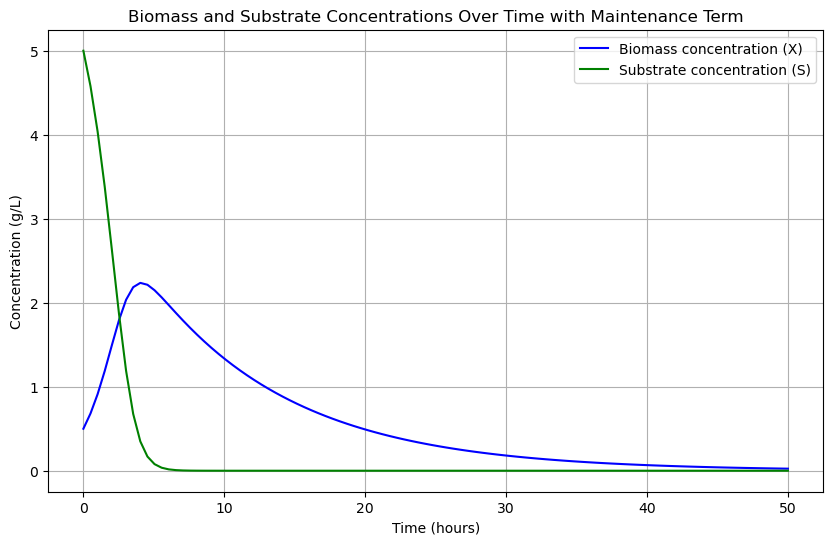

In [7]:
# Plot biomass and substrate concentrations
plt.figure(figsize=(10, 6))
plt.plot(t, X, label='Biomass concentration (X)', color='b')
plt.plot(t, S, label='Substrate concentration (S)', color='g')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration (g/L)')
plt.legend()
plt.title('Biomass and Substrate Concentrations Over Time with Maintenance Term')
plt.grid(True)
plt.show()

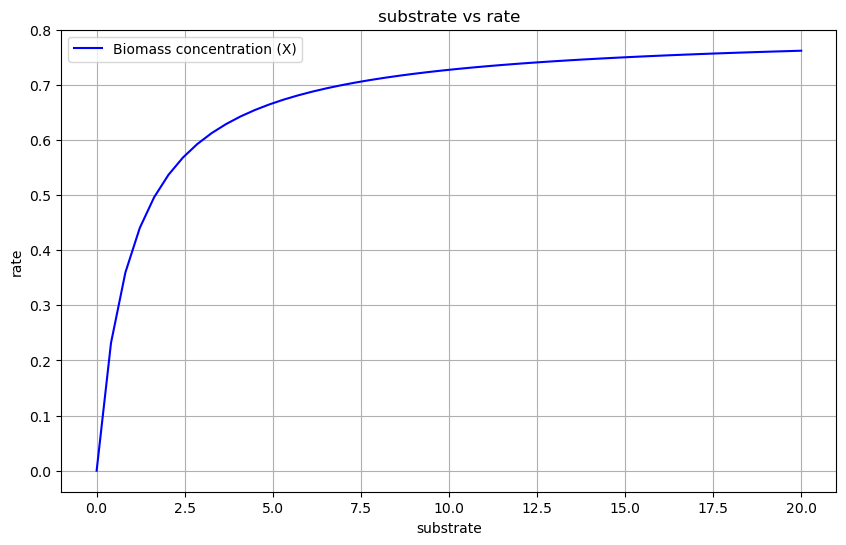

In [11]:
s = np.linspace(0, 20)
ki = 1
km = 0.1
vmax = 0.8
x = 1
mu = vmax * s / ((kc*x) + s)

plt.figure(figsize=(10, 6))
plt.plot(s, mu, label='Biomass concentration (X)', color='b')
plt.xlabel('substrate')
plt.ylabel('rate')
plt.legend()
plt.title('substrate vs rate')
plt.grid(True)
plt.show()